# Proyecto I : Dato inicial para un objeto compacto
## Formulación en coord cilindricas

In [1]:
Atom = false
#Atom = true

false

In [2]:
using Gridap
using GridapODEs
if  Atom == false
    using GridapMakie, GLMakie
end
using FileIO
using GridapGmsh
using gmsh
using Gridap.CellData
using Gridap.Visualization
using Gridap.Arrays

In [3]:
Threads.nthreads()

7

In [4]:
model = GmshDiscreteModel("modelos/rectangle_NS.msh")

Info    : Reading 'modelos/rectangle_NS.msh'...
Info    : 9 entities
Info    : 64133 nodes
Info    : 128264 elements
Info    : Done reading 'modelos/rectangle_NS.msh'                          


UnstructuredDiscreteModel()

In [5]:
Ω = Triangulation(model)
degree = 3
dΩ = Measure(Ω,degree)

Measure()

In [6]:
writevtk(Ω,"square")

(["square.vtu"],)

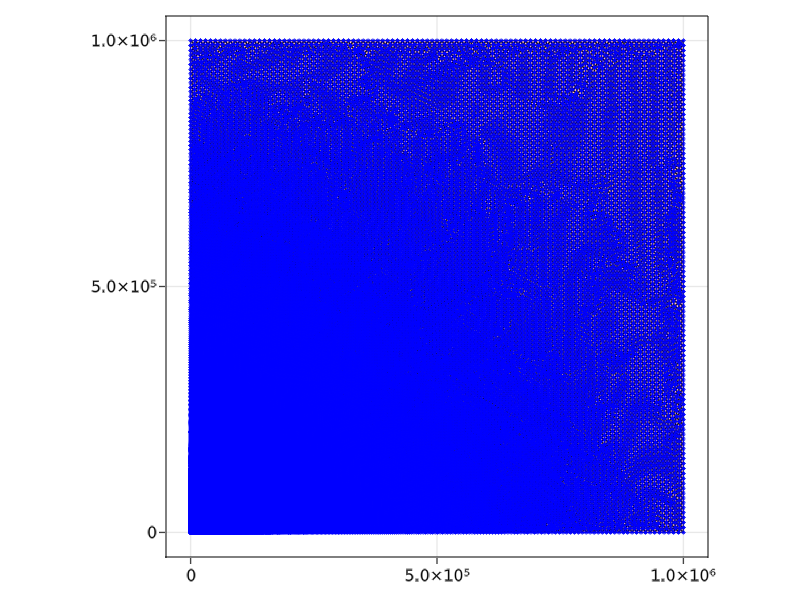

In [7]:
if Atom == false 
    fig, ax = plot(Ω)
    ax.aspect = AxisAspect(1) # this makes the region with fixed aspect, so it might not give the correct ratios
    wireframe!(Ω, color=:black, linewidth=1)
    scatter!(Ω, marker=:star8, markersize=4, color=:blue)
    fig
end 

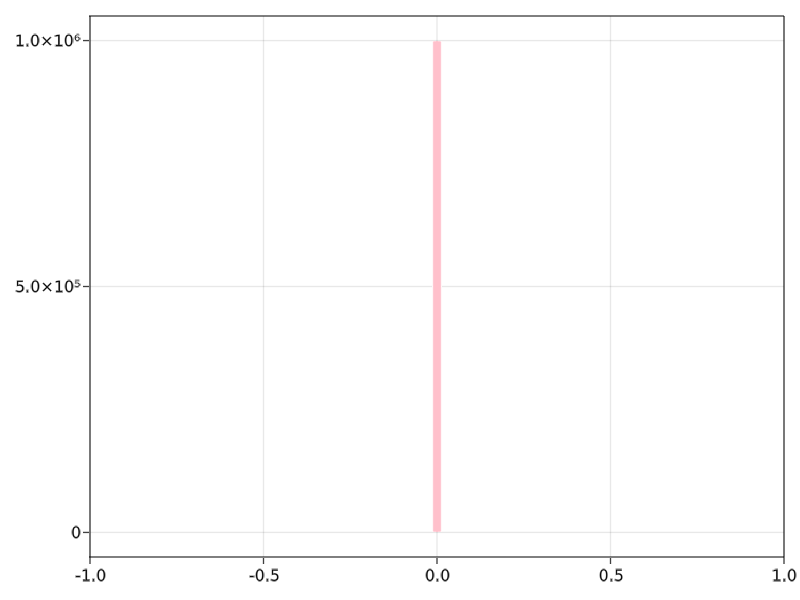

In [8]:
neumanntags_crho= ["centrorho"]
Γ_crho = BoundaryTriangulation(model,tags=neumanntags_crho)
dΓ_crho = Measure(Γ_crho,degree)
if Atom == false 
    fig = plot(Γ_crho, linewidth=8
    #, shading=true
    )
end

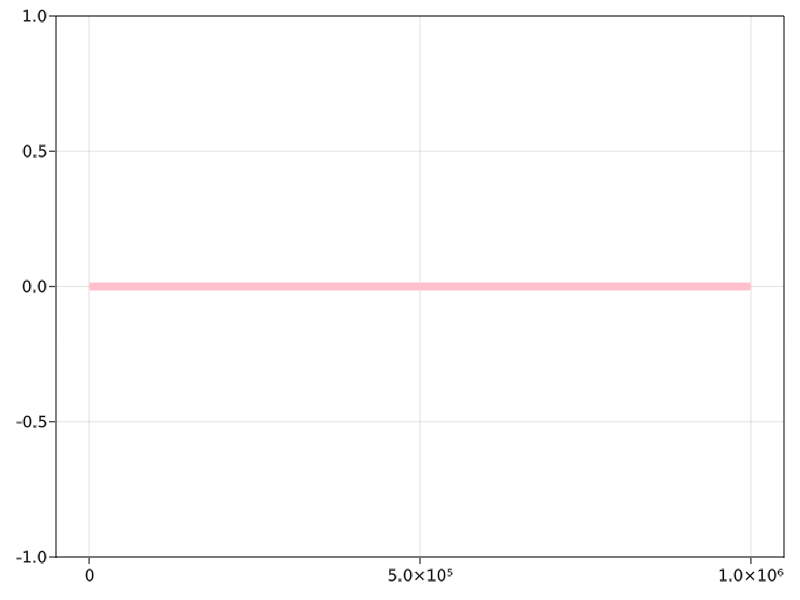

In [9]:
neumanntags_cz= [ "centroz"]
Γ_cz = BoundaryTriangulation(model,tags=neumanntags_cz)
dΓ_cz= Measure(Γ_cz,degree)
if Atom == false 
    fig = plot(Γ_cz, linewidth=8
    #, shading=true
      )
end

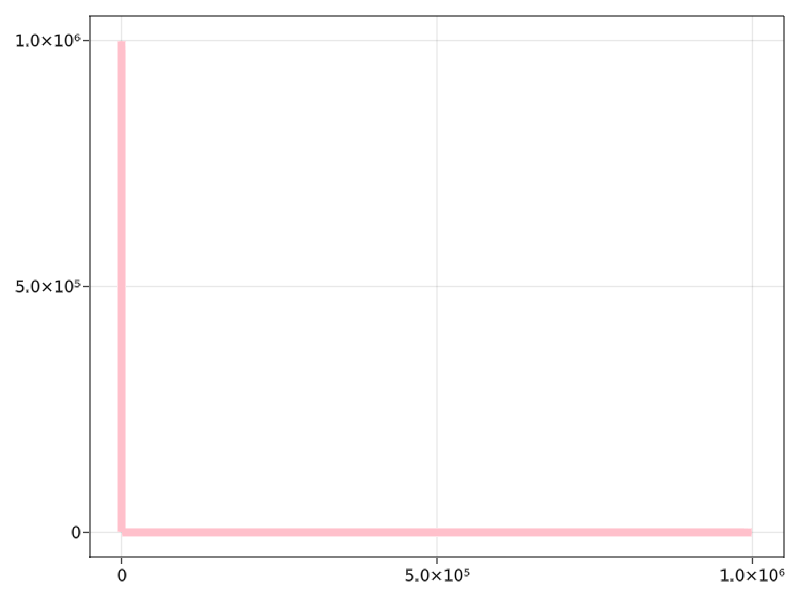

In [10]:
neumanntags_centro = [ "centroz", "centrorho"]
Γ_centro = BoundaryTriangulation(model,tags=neumanntags_centro)
dΓ_centro = Measure(Γ_centro,degree)
if Atom == false 
    fig = plot(Γ_centro, linewidth=8
    #, shading=true
    )
end

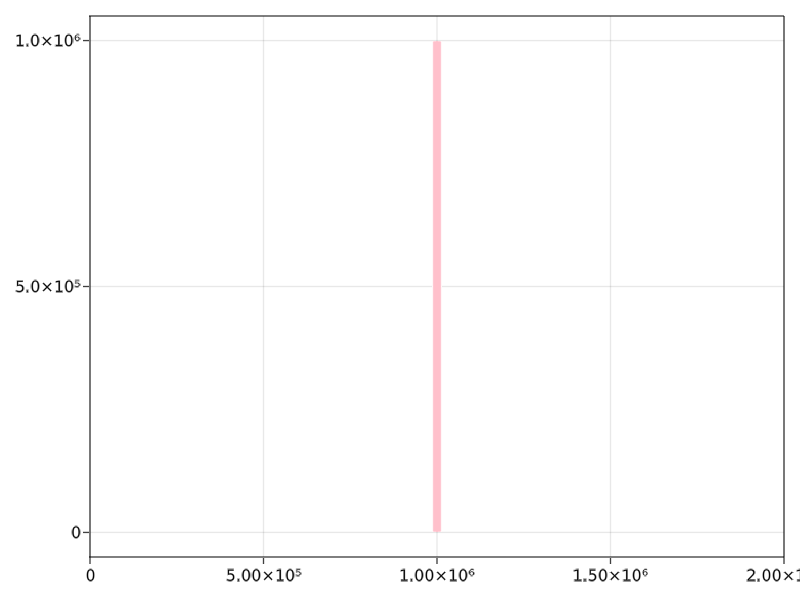

In [11]:
neumanntags_extrho = [ "asintrho"]
Γ_extrho = BoundaryTriangulation(model,tags=neumanntags_extrho)
dΓ_extrho = Measure(Γ_extrho,degree)
if Atom == false 
    fig = plot(Γ_extrho, linewidth=8
    #, shading=true
   )
end    

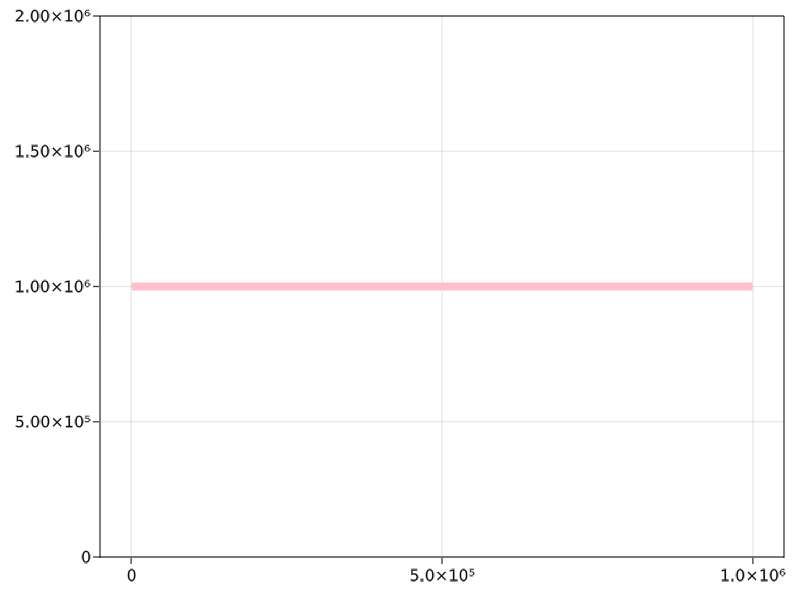

In [12]:
neumanntags_extz = [  "asintz" ]
Γ_extz = BoundaryTriangulation(model,tags=neumanntags_extz)
dΓ_extz = Measure(Γ_extz,degree)
if Atom == false 
    fig = plot(Γ_extz, linewidth=8
    #, shading=true
   )
end   

In [13]:
order = 2
reffe = ReferenceFE(lagrangian,Float64,order)
V = TestFESpace(model,reffe,conformity=:H1)
U = TrialFESpace(V)


order3 = 3
reffe3 = ReferenceFE(lagrangian,Float64,order3)
V3 = TestFESpace(model,reffe3,conformity=:H1)
U3 = TrialFESpace(V3)

UnconstrainedFESpace()

In [14]:
SB= false
# true Spherical objet
# false  Concave objet

false

In [15]:
# fuente, a tiene la info del objeto 
a0=6.0E-18

#Shperical Body
R=7.5E5
Z=7.3E5

#Concave body
B=5.0E5
D= 0.3

function s(x)
    if SB == true
        return sqrt((x[1]/ R)^2 + (x[2]/Z)^2) 
        end
    if !SB == true
       return  sqrt((x[1])^2 + (x[2])^2 ) /( B *(D + (x[1]^2 /(x[1]^2 +x[2]^2 +0.00000001)) )  ) #((x[1])^2 + (x[2])^2 )^(3/2) /( B *(D* x[2]^2 +(D+1.)*x[1]^2 )  )
       end
end

q(x)=1. - s(x) ^4 * (1. - 5. *(s(x) -1.) + 15. * (s(x)-1.)^2 - 35. *(s(x) -1.)^3 +70. * (s(x)- 1.)^4)

function α(x)
  if s(x)  < 1.
        return q(x)*a0
        end
    if s(x) >= 1.
       return  0.
    end
end

t(x) = 8*π*α(x)

#Cond de Newman borde centro
c(x)=0.


c (generic function with 1 method)

In [16]:
if SB == true
    return writevtk(Ω,"resultados/Proyecto1/NS/α_spherical",cellfields=["α"=>α])
end
if !SB == true
    return  writevtk(Ω,"resultados/Proyecto1/NS/α_concave",cellfields=["α"=>α])
end

(["resultados/Proyecto1/NS/α_concave.vtu"],)

In [17]:
d(x) = VectorValue(2. ,0)
conv(l,∇t) = (∇t')⋅l

conv (generic function with 1 method)

In [18]:
ρ(x)=x[1]
ρvec(x) = VectorValue(1.,0)
zvec(x) = VectorValue(0,1.)
z(x)=x[2]

z (generic function with 1 method)

In [19]:
a(u,v) = ∫( (d  ⋅ ∇(u))*v - ∇(v) ⋅ ∇(u)*ρ  ) *dΩ + ∫( -v *( u +(zvec ⋅ ∇(u))*z) ) *dΓ_extrho +   ∫(- v *(u * ρ/z +(ρvec ⋅ ∇(u))*ρ*ρ/z) ) *dΓ_extz  
b(v) = ∫(-v * t* ρ) *dΩ + ∫( c * v *ρ ) *dΓ_centro

b (generic function with 1 method)

In [20]:
op = AffineFEOperator(a,b,U,V)

AffineFEOperator()

In [21]:
ls = LUSolver()
solver = LinearFESolver(ls)

LinearFESolver()

In [22]:
uh = solve(solver,op)

SingleFieldFEFunction():
 num_cells: 126998
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 12071962086131361422

In [23]:
u_0 = Interpolable(uh)
u0= interpolate_everywhere(u_0,U3)

SingleFieldFEFunction():
 num_cells: 126998
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 12071962086131361422

In [24]:
op_order3 = AffineFEOperator(a,b,U3,V3)

AffineFEOperator()

In [25]:
uh_order3, = solve!(u0,solver,op_order3)

(SingleFieldFEFunction(), LUNumericalSetup())

In [26]:
if SB == true
    return writevtk(Ω,"resultados/Proyecto1/NS/f_spherical",cellfields=["f"=>uh])
end
if !SB == true
    return  writevtk(Ω,"resultados/Proyecto1/NS/f_concave",cellfields=["f"=>uh])

end

if SB == true
    return writevtk(Ω,"resultados/Proyecto1/NS/∇f_spherical",cellfields=["∇f"=>∇(uh)])
end
if !SB == true
    return  writevtk(Ω,"resultados/Proyecto1/NS/∇f_concave",cellfields=["∇f"=>∇(uh)])

end

#NO HAY CAMBIOS NOTABLES AL USAR FE DE ORDEN 3
if SB == true
    return writevtk(Ω,"resultados/Proyecto1/NS/f3_spherical",cellfields=["f"=>uh_order3])
end
if !SB == true
    return  writevtk(Ω,"resultados/Proyecto1/NS/f3_concave",cellfields=["f"=>uh_order3])

end

if SB == true
    return writevtk(Ω,"resultados/Proyecto1/NS/∇f3_spherical",cellfields=["∇f"=>∇(uh_order3)])
end
if !SB == true
    return  writevtk(Ω,"resultados/Proyecto1/NS/∇f3_concave",cellfields=["∇f"=>∇(uh_order3)])

end

(["resultados/Proyecto1/NS/∇f3_concave.vtu"],)

In [27]:
invrho3(x)=3. / x[1]

invrho3 (generic function with 1 method)

In [28]:
f1=conv∘(ρvec,∇(uh))
f2=conv∘(zvec,∇(uh))
F=f2*f2 +f1*f1

OperationCellField():
 num_cells: 126998
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 12071962086131361422

In [29]:
f13=conv∘(ρvec,∇(uh_order3))
f23=conv∘(zvec,∇(uh_order3))
F3=f23*f23 +f13*f13

OperationCellField():
 num_cells: 126998
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 12071962086131361422

In [30]:
Residual_f_cuad =( Δ(uh)+invrho3 *f1+t)* ( Δ(uh)+invrho3 *f1+t )
Residual_f3_cuad =( Δ(uh_order3)+invrho3 *f13+t)* ( Δ(uh_order3)+invrho3 *f13+t )

OperationCellField():
 num_cells: 126998
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 12071962086131361422

In [31]:
L2norm_residual_f= sqrt(sum( ∫( Residual_f_cuad)*dΩ ))

1.7778189131916655e-13

In [32]:
L2norm_residual_f3= sqrt(sum( ∫( Residual_f3_cuad)*dΩ ))

1.5275923024472465e-11

In [33]:
if SB == true
    return writevtk(Ω,"resultados/Proyecto1/NS/residualf_spherical",cellfields=["res"=>Δ(uh)+invrho3 *f1+t])
end
if !SB == true
    return  writevtk(Ω,"resultados/Proyecto1/NS/residualf_concave",cellfields=["res"=>Δ(uh)+invrho3 *f1+t])
end

if SB == true
    return writevtk(Ω,"resultados/Proyecto1/NS/residualf3_spherical",cellfields=["res"=>Δ(uh_order3)+invrho3 *f13+t])
end
if !SB == true
    return  writevtk(Ω,"resultados/Proyecto1/NS/residualf3_concave",cellfields=["res"=>Δ(uh_order3)+invrho3 *f13+t])
end


(["resultados/Proyecto1/NS/residualf3_concave.vtu"],)

### Factor conforme

In [34]:
function t1(x)
  return 2. * π*α(x)
end

function t2(x)
  return 6. * π*α(x)
end

t2 (generic function with 1 method)

In [35]:
res(w,w2)=  ∫(  - (∇(w2) ⋅ ∇(w))*ρ  + t1 *( (w2*ρ * ρ)/(w*w*w)) + (0.25 * F *ρ *  ρ* ρ) * w2*(1/(w*w*w*w*w*w*w))) *dΩ +∫( c * w2 *ρ ) *dΓ_centro +∫( -w2 *( (w- 1.) +(zvec ⋅ ∇(w))*z) ) *dΓ_extrho +   ∫( -w2 *( (w -1. )*ρ/z +(ρvec ⋅ ∇(w))*ρ*ρ/z) ) *dΓ_extz

res (generic function with 1 method)

In [36]:
res3(w,w2)=  ∫(  - (∇(w2) ⋅ ∇(w))*ρ  + t1 *( (w2*ρ * ρ)/(w*w*w)) + (0.25 * F3 *ρ *  ρ* ρ) * w2*(1/(w*w*w*w*w*w*w))) *dΩ +∫( c * w2 *ρ ) *dΓ_centro +∫( -w2 *( (w- 1.) +(zvec ⋅ ∇(w))*z) ) *dΓ_extrho +   ∫( -w2 *( (w -1. )*ρ/z +(ρvec ⋅ ∇(w))*ρ*ρ/z) ) *dΓ_extz

res3 (generic function with 1 method)

In [37]:
jac(w,dw,w2)= ∫(  - ( ∇(w2) ⋅ ∇(dw))*ρ   - ((dw* w2*ρ *  ρ)/(w*w*w*w))*t2   -(1.75 * F *ρ  * ρ* ρ) * dw *w2*(1/(w*w*w*w*w*w*w*w))   ) *dΩ +∫( -w2 *( (dw#=- 1.=#) +(zvec ⋅ ∇(dw))*z) ) *dΓ_extrho +   ∫( -w2 *( (dw #=-1.=# )*ρ/z +(ρvec ⋅ ∇(dw))*ρ*ρ/z) ) *dΓ_extz 

jac (generic function with 1 method)

In [38]:
jac3(w,dw,w2)= ∫(  - ( ∇(w2) ⋅ ∇(dw))*ρ   - ((dw* w2*ρ *  ρ)/(w*w*w*w))*t2   -(1.75 * F3 *ρ  * ρ* ρ) * dw *w2*(1/(w*w*w*w*w*w*w*w))   ) *dΩ +∫( -w2 *( (dw#=- 1.=#) +(zvec ⋅ ∇(dw))*z) ) *dΓ_extrho +   ∫( -w2 *( (dw #=-1.=# )*ρ/z +(ρvec ⋅ ∇(dw))*ρ*ρ/z) ) *dΓ_extz 

jac3 (generic function with 1 method)

In [39]:
oppsi = FEOperator(res,jac,U,V)
oppsi3 = FEOperator(res3,jac3,U3,V3)

FEOperatorFromWeakForm()

In [40]:
using LineSearches: BackTracking
nls = NLSolver(
  show_trace=true, method=:newton, linesearch=BackTracking(),ftol=1E-15, xtol= 1E-20,iterations=50)
solver = FESolver(nls)

NonlinearFESolver()

In [41]:
seed(x)=1.
w02=interpolate_everywhere(seed,U)

SingleFieldFEFunction():
 num_cells: 126998
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 12071962086131361422

In [42]:
w, = solve!(w02,solver,oppsi)

Iter     f(x) inf-norm    Step 2-norm 
------   --------------   --------------
     0     1.963717e+01              NaN
     1     8.982331e+00     6.699596e+03
     2     7.713106e-01     1.182881e+02
     3     5.745963e-03     8.173095e-01
     4     1.583636e-07     1.616146e-05
     5     1.115723e-09     3.454827e-14
     6     1.141302e-09     1.553764e-26
     7     1.107253e-09     2.504657e-26
     8     9.607675e-10     2.821105e-26
     9     1.159009e-09     5.834452e-27
    10     9.612933e-10     9.086199e-28
    11     9.612933e-10     0.000000e+00


(SingleFieldFEFunction(), NLSolversCache())

In [43]:
w_3 = Interpolable(w)
w0_order3=interpolate_everywhere(w_3,U3)

SingleFieldFEFunction():
 num_cells: 126998
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 12071962086131361422

In [44]:
w3, = solve!(w0_order3,solver,oppsi3)

Iter     f(x) inf-norm    Step 2-norm 
------   --------------   --------------
     0     1.594666e+00              NaN
     1     2.995445e-05     7.919661e-06
     2     1.678870e-09     5.629285e-16
     3     1.628635e-09     4.487014e-24
     4     1.453117e-09     2.060583e-24
     5     1.415060e-09     6.241344e-27
     6     1.420972e-09     9.435553e-27
     7     1.879755e-09     1.137078e-26
     8     1.879755e-09     4.064113e-28
     9     1.879755e-09     8.628166e-32
    10     1.879755e-09     0.000000e+00


(SingleFieldFEFunction(), NLSolversCache())

In [45]:
if SB == true
    return writevtk(Ω,"resultados/Proyecto1/NS/Fact_spherical",cellfields=["ψ"=>w])
end
if !SB == true
    return writevtk(Ω,"resultados/Proyecto1/NS/Fact_concave",cellfields=["ψ"=>w])
end

if SB == true
    return writevtk(Ω,"resultados/Proyecto1/NS/Fact3_spherical",cellfields=["ψ"=>w3])
end
if !SB == true
    return writevtk(Ω,"resultados/Proyecto1/NS/Fact3_concave",cellfields=["ψ"=>w3])
end



(["resultados/Proyecto1/NS/Fact3_concave.vtu"],)

In [46]:
invrho(x)=1/x[1]

invrho (generic function with 1 method)

In [47]:
if SB == true
    return writevtk(Ω,"resultados/Proyecto1/NS/residualFact_spherical",cellfields=["resi"=>Δ(w)+invrho* (ρvec ⋅ ∇(w))+ t1 * (  ρ/(w*w*w))+  (0.25 * F *ρ *   ρ) * (1/(w*w*w*w*w*w*w))])
end
if !SB == true
    return writevtk(Ω,"resultados/Proyecto1/NS/residualFact_concave",cellfields=["resi"=>Δ(w)+invrho* (ρvec ⋅ ∇(w))+ t1 * (  ρ/(w*w*w))+  (0.25 * F *ρ *   ρ) * (1/(w*w*w*w*w*w*w))])
end

if SB == true
    return writevtk(Ω,"resultados/Proyecto1/NS/residualFact3_spherical",cellfields=["resi"=>Δ(w3)+invrho* (ρvec ⋅ ∇(w3))+ t1 * (  ρ/(w3*w3*w3))+  (0.25 * F3 *ρ *   ρ) * (1/(w3*w3*w3*w3*w3*w3*w3))])
end
if !SB == true
    return writevtk(Ω,"resultados/Proyecto1/NS/residualFact3_concave",cellfields=["resi"=>Δ(w3)+invrho* (ρvec ⋅ ∇(w3))+ t1 * (  ρ/(w3*w3*w3))+  (0.25 * F3 *ρ *   ρ) * (1/(w3*w3*w3*w3*w3*w3*w3))])
end

(["resultados/Proyecto1/NS/residualFact3_concave.vtu"],)

In [48]:
Residual_fac_cuad =( Δ(w)+invrho* (ρvec ⋅ ∇(w))+ t1 * (  ρ/(w*w*w))+  (0.25 * F *ρ *   ρ) * (1/(w*w*w*w*w*w*w)))* ( Δ(w)+invrho* (ρvec ⋅ ∇(w))+ t1 * (  ρ/(w*w*w))+  (0.25 * F *ρ *   ρ) * (1/(w*w*w*w*w*w*w)) )
Residual_fac3_cuad =( Δ(w3)+invrho* (ρvec ⋅ ∇(w3))+ t1 * (  ρ/(w3*w3*w3))+  (0.25 * F3 *ρ *   ρ) * (1/(w3*w3*w3*w3*w3*w3*w3)))* ( Δ(w3)+invrho* (ρvec ⋅ ∇(w3))+ t1 * (  ρ/(w3*w3*w3))+  (0.25 * F3 *ρ *   ρ) * (1/(w3*w3*w3*w3*w3*w3*w3)) )

OperationCellField():
 num_cells: 126998
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 12071962086131361422

In [49]:
L2norm_residual_fac= sqrt(sum( ∫( Residual_fac_cuad)*dΩ ))

3.404290496844685e-8

In [50]:
L2norm_residual_fac3= sqrt(sum( ∫( Residual_fac3_cuad)*dΩ))

3.3649955702243157e-6